### 모델 어쩌고 저쩌고
![](./static/너굴맨.jpg)  
집에 가고 싶다

In [5]:
import tensorflow as tf

import pandas as pd
import numpy as np


from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import random
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('./output/DL_data.csv',index_col=0)

In [3]:
df.columns

Index(['year', 'month', 'day', 'hour', 'datetime', 'temp', 'rainfall',
       'humidity', 'wind_speed', 'wind_direction', 'region', 'HI', 'DI',
       'height', '가로등', '교육용', '농사용', '산업용', '심야', '일반용', '임시전력', '주택용'],
      dtype='object')

In [4]:
df = df[['year', 'month', 'day', 'hour', 'datetime', 'temp', 'rainfall',
       'humidity', 'wind_speed', 'wind_direction', 'region', 'HI', 'DI',
       'height']]
df

,year,month,day,hour,datetime,temp,rainfall,humidity,wind_speed,wind_direction,region,HI,DI,height
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,53.0,NaN,NaN,동인동,15.589444,60.74355,42.48
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,49.0,NaN,NaN,동인동,17.245000,62.73431,42.48
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,46.0,NaN,NaN,동인동,18.926667,64.65038,42.48
3,2010,6,1,3,2010-06-01 03:00:00,20.8,0.0,41.0,NaN,NaN,동인동,20.006111,65.72772,42.48
4,2010,6,1,4,2010-06-01 04:00:00,22.2,0.0,36.0,NaN,NaN,동인동,21.415556,67.04608,42.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,2022-04-30 19:00:00,10.7,0.0,71.0,2.1,335.0,구지면,9.679444,52.33503,28.31
14831612,2022,4,30,20,2022-04-30 20:00:00,11.0,0.0,65.0,2.2,339.0,구지면,9.852778,52.99350,28.31
14831613,2022,4,30,21,2022-04-30 21:00:00,11.9,0.0,61.0,2.2,338.0,구지면,10.738333,54.40241,28.31
14831614,2022,4,30,22,2022-04-30 22:00:00,13.4,0.0,53.0,2.0,351.0,구지면,12.179444,56.60598,28.31


* 풍속 Nan 전처리
* 결측치는 가능한한 없게끔

# 선형회귀분석

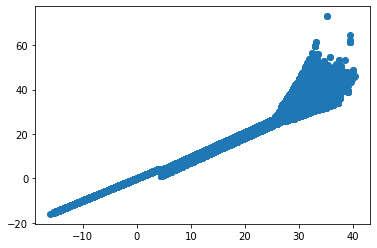

In [12]:
X = df["temp"]
y = df["HI"]
plt.plot(X, y, 'o')
plt.show()

In [13]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [14]:
line_fitter.predict([[33]])

array([34.04453277])

In [15]:
line_fitter.coef_

array([1.06474646])

In [16]:
line_fitter.intercept_

-1.09210025034365

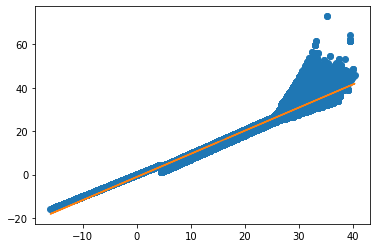

In [17]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

  # 다중 선형회귀분석

In [23]:
from sklearn.model_selection import train_test_split

x = df[['year', 'month', 'day', 'hour', 'temp', 'rainfall','humidity', 'DI', 'height']]

y = df[['HI']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [24]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [25]:
target_HI = [[2022, 6, 16, 14, 26, 15.5, 17, 60, 45]]
my_predict = mlr.predict(target_HI)

c:\git_project\Team_Project\.venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
y_predict = mlr.predict(x_test)

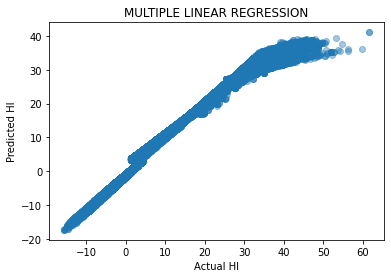

In [27]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual HI")
plt.ylabel("Predicted HI")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

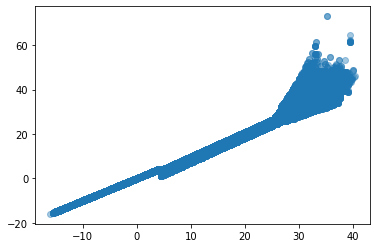

In [28]:
# 기온과 열지수 관계
plt.scatter(df[['temp']], df[['HI']], alpha=0.4)
plt.show()

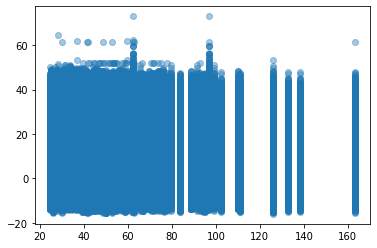

In [29]:
# 고도와 열지수 관계
plt.scatter(df[['height']], df[['HI']], alpha=0.4)
plt.show()

In [32]:
print(mlr.score(x_train, y_train))

0.9893272668154918
